###**No1. Regresi (Harga Rumah)**

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

# 1. Upload file .xlsx
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2. Membaca file .xlsx
df = pd.read_excel(file_name)

# 3. Memeriksa data
print("Dataframe Head:")
print(df.head())
print("\nInfo:")
print(df.info())

# 4. Mengubah fitur kategorikal menjadi numerik
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    # Konversi semua nilai menjadi string untuk menghindari tipe campuran
    df[column] = df[column].astype(str)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("\nData setelah transformasi kategorikal:")
print(df.head())

# 5. Normalisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

print("\nData setelah normalisasi:")
print(df_scaled.head())

# 6. Memisahkan data menjadi fitur (X) dan target (y)
X = df_scaled.iloc[:, :-1]  # Semua kolom kecuali yang terakhir sebagai fitur
y = df_scaled.iloc[:, -1]   # Kolom terakhir sebagai target

# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 8. Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# 9. Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nEvaluasi Model: {model_name}")
    print(f"R-squared: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MSE: {mse:.2f}")

# Evaluasi untuk Multiple Linear Regression
evaluate_model(y_test, y_pred_linear, "Multiple Linear Regression")

# Evaluasi untuk Polynomial Regression
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# 10. Visualisasi hasil dengan scatter plot
# Scatter plot untuk Multiple Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Prediksi (Linear)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal Fit')
plt.title('Multiple Linear Regression: Prediksi vs Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot untuk Polynomial Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6, label='Prediksi (Polynomial)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Ideal Fit')
plt.title('Polynomial Regression: Prediksi vs Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# 11. Kesimpulan
print("\nKesimpulan:")
if r2_score(y_test, y_pred_poly) > r2_score(y_test, y_pred_linear):
    print("Model Polynomial Regression memiliki performa lebih baik.")
else:
    print("Model Multiple Linear Regression memiliki performa lebih baik.")


### **No2.Klasifikasi (Titanic)**


Dataset Loaded:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Kolom dalam dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object

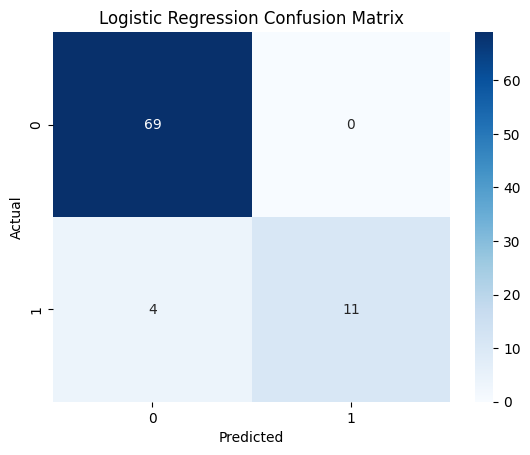


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        69
         1.0       1.00      0.73      0.85        15

    accuracy                           0.95        84
   macro avg       0.97      0.87      0.91        84
weighted avg       0.95      0.95      0.95        84


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.87
Precision: 0.64
Recall: 0.60
F1-Score: 0.62

Confusion Matrix:
[[64  5]
 [ 6  9]]


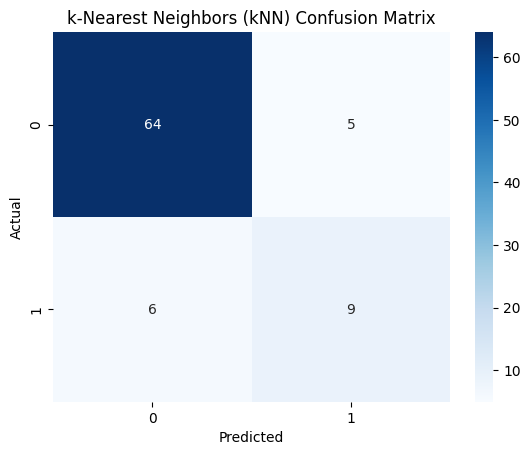


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        69
         1.0       0.64      0.60      0.62        15

    accuracy                           0.87        84
   macro avg       0.78      0.76      0.77        84
weighted avg       0.87      0.87      0.87        84


Support Vector Machine (SVM) Performance:
Accuracy: 0.95
Precision: 1.00
Recall: 0.73
F1-Score: 0.85

Confusion Matrix:
[[69  0]
 [ 4 11]]


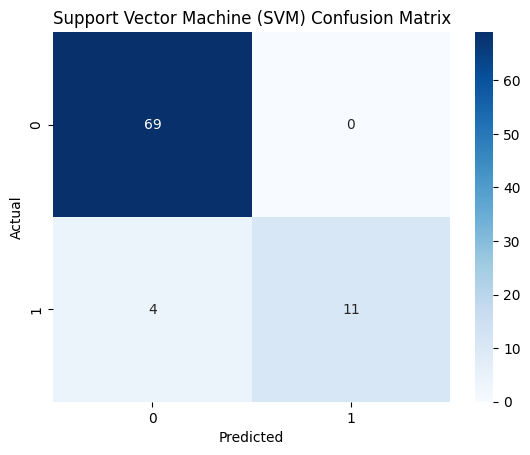


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        69
         1.0       1.00      0.73      0.85        15

    accuracy                           0.95        84
   macro avg       0.97      0.87      0.91        84
weighted avg       0.95      0.95      0.95        84



In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/test.csv'
data = pd.read_csv(file_path)

# Menampilkan info awal dataset
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

# 1. Membuat Target Dummy (HighFare: 1 jika Fare > rata-rata, 0 jika sebaliknya)
average_fare = data['Fare'].mean()
data['HighFare'] = (data['Fare'] > average_fare).astype(int)

# 2. Preprocessing Data
# a. Menangani missing values
print("\nMengatasi missing values...")
imputer = SimpleImputer(strategy='mean')  # Untuk nilai numerik
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

print("Missing values setelah diatasi:")
print(data.isnull().sum())

# b. Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Data setelah encoding:")
print(data.head())

# 3. Membagi dataset menjadi fitur (X) dan target (y)
print("\nMembagi dataset menjadi fitur (X) dan target (y)...")
target_column = 'HighFare'
X = data.drop(columns=[target_column, 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop kolom yang tidak relevan
y = data[target_column]

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset berhasil dibagi.")

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model dan Evaluasi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")



Dataset Loaded:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

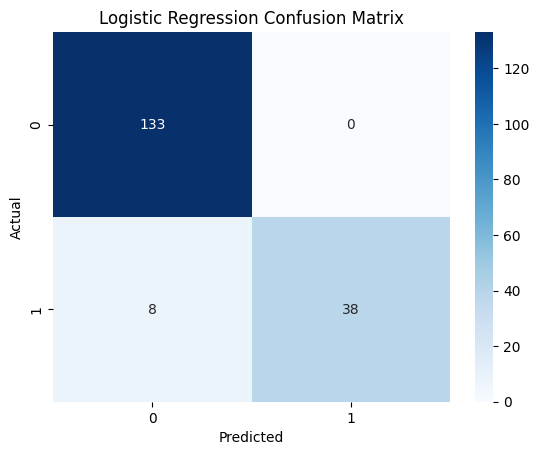


Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       133
         1.0       1.00      0.83      0.90        46

    accuracy                           0.96       179
   macro avg       0.97      0.91      0.94       179
weighted avg       0.96      0.96      0.95       179


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.90
Precision: 0.91
Recall: 0.67
F1-Score: 0.78

Confusion Matrix:
[[130   3]
 [ 15  31]]


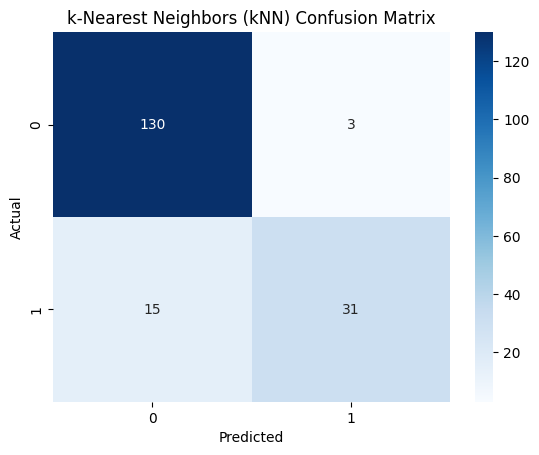


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       133
         1.0       0.91      0.67      0.78        46

    accuracy                           0.90       179
   macro avg       0.90      0.83      0.86       179
weighted avg       0.90      0.90      0.89       179


Support Vector Machine (SVM) Performance:
Accuracy: 0.96
Precision: 1.00
Recall: 0.83
F1-Score: 0.90

Confusion Matrix:
[[133   0]
 [  8  38]]


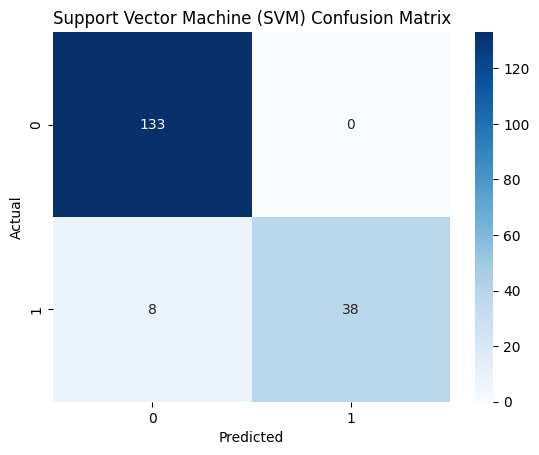


Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       133
         1.0       1.00      0.83      0.90        46

    accuracy                           0.96       179
   macro avg       0.97      0.91      0.94       179
weighted avg       0.96      0.96      0.95       179



In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Menampilkan info awal dataset
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

# 1. Membuat Target Dummy (HighFare: 1 jika Fare > rata-rata, 0 jika sebaliknya)
average_fare = data['Fare'].mean()
data['HighFare'] = (data['Fare'] > average_fare).astype(int)

# 2. Preprocessing Data
# a. Menangani missing values
print("\nMengatasi missing values...")
imputer = SimpleImputer(strategy='mean')  # Untuk nilai numerik
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

print("Missing values setelah diatasi:")
print(data.isnull().sum())

# b. Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Data setelah encoding:")
print(data.head())

# 3. Membagi dataset menjadi fitur (X) dan target (y)
print("\nMembagi dataset menjadi fitur (X) dan target (y)...")
target_column = 'HighFare'
X = data.drop(columns=[target_column, 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Drop kolom yang tidak relevan
y = data[target_column]

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset berhasil dibagi.")

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model dan Evaluasi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Logistic Regression
log_reg = LogisticRegression()
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")



Dataset Loaded:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Kolom dalam dataset: Index(['PassengerId', 'Survived'], dtype='object')

Mengatasi missing values...
Missing values setelah diatasi:
PassengerId       0
Survived          0
Survived_Dummy    0
dtype: int64

Encoding fitur kategorikal...
Data setelah encoding:
   PassengerId  Survived  Survived_Dummy
0        892.0       0.0             0.0
1        893.0       1.0             1.0
2        894.0       0.0             0.0
3        895.0       0.0             0.0
4        896.0       1.0             1.0

Membagi dataset menjadi fitur (X) dan target (y)...

Distribusi kelas:
Survived_Dummy
0.0    266
1.0    152
Name: count, dtype: int64
Dataset berhasil dibagi.

Logistic Regression Performance:
Accuracy: 0.50
Precision: 0.34
Recall: 0.39
F1-Score: 0.36

Confusion Matrix:
[[30 23]
 [19 12]]


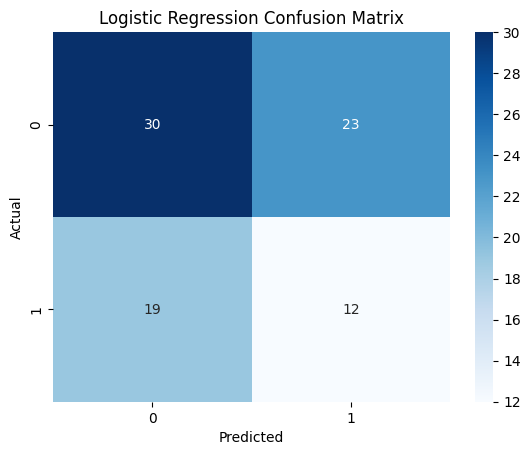


Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59        53
         1.0       0.34      0.39      0.36        31

    accuracy                           0.50        84
   macro avg       0.48      0.48      0.48        84
weighted avg       0.51      0.50      0.51        84


k-Nearest Neighbors (kNN) Performance:
Accuracy: 0.52
Precision: 0.26
Recall: 0.16
F1-Score: 0.20

Confusion Matrix:
[[39 14]
 [26  5]]


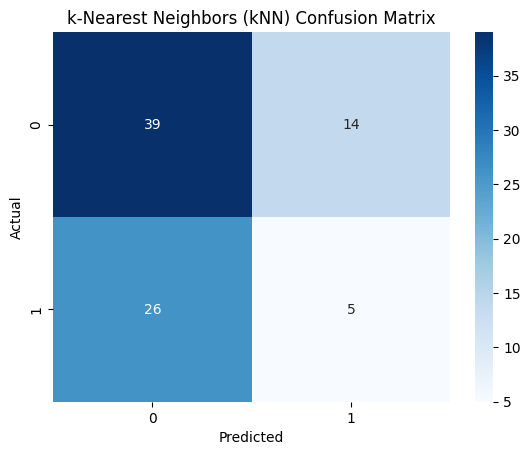


Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.74      0.66        53
         1.0       0.26      0.16      0.20        31

    accuracy                           0.52        84
   macro avg       0.43      0.45      0.43        84
weighted avg       0.48      0.52      0.49        84


Support Vector Machine (SVM) Performance:
Accuracy: 0.50
Precision: 0.34
Recall: 0.39
F1-Score: 0.36

Confusion Matrix:
[[30 23]
 [19 12]]


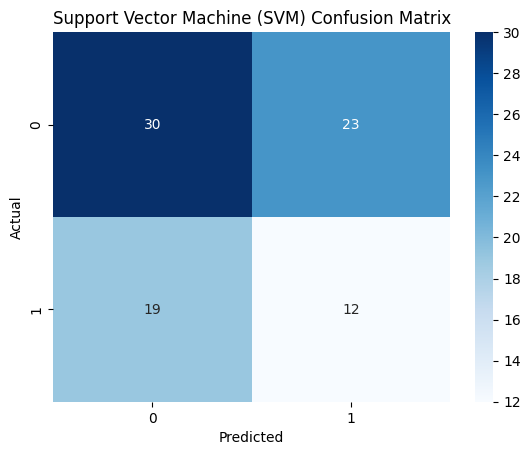


Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59        53
         1.0       0.34      0.39      0.36        31

    accuracy                           0.50        84
   macro avg       0.48      0.48      0.48        84
weighted avg       0.51      0.50      0.51        84



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/gender_submission.csv'
data = pd.read_csv(file_path)

# Menampilkan info awal dataset
print("\nDataset Loaded:")
print(data.head())
print("\nKolom dalam dataset:", data.columns)

# 1. Membuat Target Dummy (Survived_Dummy: 1 jika Survived > 0, 0 jika sebaliknya)
data['Survived_Dummy'] = (data['Survived'] > 0).astype(int)

# 2. Preprocessing Data
# a. Menangani missing values
print("\nMengatasi missing values...")
imputer = SimpleImputer(strategy='mean')  # Untuk nilai numerik
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

print("Missing values setelah diatasi:")
print(data.isnull().sum())

# b. Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("Data setelah encoding:")
print(data.head())

# 3. Membagi dataset menjadi fitur (X) dan target (y)
print("\nMembagi dataset menjadi fitur (X) dan target (y)...")
target_column = 'Survived_Dummy'
X = data.drop(columns=[target_column, 'Survived'])  # Drop kolom yang tidak relevan
y = data[target_column]

# Periksa distribusi kelas
print("\nDistribusi kelas:")
print(y.value_counts())

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Dataset berhasil dibagi.")

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model dan Evaluasi
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=1)
    rec = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nConfusion Matrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
evaluate_model(log_reg, "Logistic Regression")

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', class_weight='balanced', probability=True)
evaluate_model(svm, "Support Vector Machine (SVM)")
